In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc.pilutil import imread
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
# 使用pandas读取数据
agg1 = pd.read_csv('lyy.csv')

In [3]:
# 探索数据结构
agg1.head()

date  game_size  \
0  2017/11/26 9:47         97   
1  2017/11/26 9:47         97   
2  2017/11/26 9:47         97   
3  2017/11/26 9:47         97   
4  2017/11/26 9:47         97   

                                            match_id match_mode  party_size  \
0  2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...        tpp           1   
1  2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...        tpp           1   
2  2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...        tpp           1   
3  2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...        tpp           1   
4  2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...        tpp           1   

   player_assists  player_dbno  player_dist_ride  player_dist_walk  \
0               0            0           0.00000       2082.823000   
1               0            0           0.00000       1118.815000   
2               0            0           0.00000         25.533026   
3               0            0         997.51000       1032.667850   
4               0            0        4296.35938       2300.323490   

   player_dmg  player_kills  player_name  player_survive_time  team_id  \
0           0             0    fuckeddup              661.491   100001   
1           0             0   nojiongegg              741.359   100002   
2          73             0    Darthmoca               83.255   100006   
3         345             3       gk1715             1144.816   100007   
4         449             4  Angeliaboby             1112.843   100021   

   team_placement  
0              50  
1              47  
2              97  
3              30  
4              32

In [4]:
agg1.shape

(10000, 15)

In [5]:
agg1.columns

Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement'],
      dtype='object')

In [6]:
agg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
date                   10000 non-null object
game_size              10000 non-null int64
match_id               10000 non-null object
match_mode             10000 non-null object
party_size             10000 non-null int64
player_assists         10000 non-null int64
player_dbno            10000 non-null int64
player_dist_ride       10000 non-null float64
player_dist_walk       10000 non-null float64
player_dmg             10000 non-null int64
player_kills           10000 non-null int64
player_name            9986 non-null object
player_survive_time    10000 non-null float64
team_id                10000 non-null int64
team_placement         10000 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 1.1+ MB


In [7]:
# 丢弃重复数据
agg1.drop_duplicates(inplace=True)

In [8]:
agg1.loc[1]

date                                                     2017/11/26 9:47
game_size                                                             97
match_id               2U4GBNA0Yml_MDIpsXDjMltu0-r8UqS8skCECcelwiP7iu...
match_mode                                                           tpp
party_size                                                             1
player_assists                                                         0
player_dbno                                                            0
player_dist_ride                                                       0
player_dist_walk                                                 1118.82
player_dmg                                                             0
player_kills                                                           0
player_name                                                   nojiongegg
player_survive_time                                              741.359
team_id                                            

In [9]:
# 添加是否成功吃鸡列
agg1['won'] = agg1['team_placement'] == 1

In [48]:
dmg = agg1.loc[agg1['player_dmg']<1600, ['player_dmg', 'won']]

In [52]:
labels=["0-0.2k", "0.2k-4k", "0.4-0.6k","0.6-0.8k", "0.8-1.0k", "1.0-1.2k", "1.2-1.4k", "1.4-1.6k"]
dmg['dmg_cut'] = pd.cut(dmg['player_dmg'],8, labels=labels)

Text(0.5,1,'伤害量与吃鸡概率的关系')

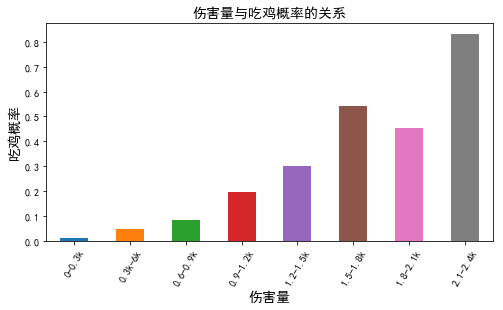

In [53]:
dmg.groupby('dmg_cut').won.mean().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("伤害量", fontsize=14)
plt.ylabel("吃鸡概率", fontsize=14)
plt.title('伤害量与吃鸡概率的关系', fontsize=14)

In [47]:
agg2 = pd.read_csv('kill.csv')

In [53]:
# 丢弃重复数据
agg2.drop_duplicates(inplace=True)

In [54]:
# 探索数据结构
agg2.head()

killed_by     killer_name  killer_placement  killer_position_x  \
0      S686          Shazta              47.0           576832.6   
1   Falling             NaN               NaN                NaN   
2      M416  xoxoDayManxoxo              85.0           686101.1   
3   Mini 14      1006504801              20.0           155900.1   
4    SCAR-L    Silverlynx14              75.0           448931.5   

   killer_position_y      map  \
0           126591.8  ERANGEL   
1                NaN  ERANGEL   
2           462681.3  ERANGEL   
3           276245.4  ERANGEL   
4           620629.8  ERANGEL   

                                            match_id  time     victim_name  \
0  2U4GBNA0YmmsEbOHao4eHZaoBUZQFNgTyGAv0-SWQL9xGG...    62       WfLOVE007   
1  2U4GBNA0YmntqNsgaJorw-V1PRATWYgv_DCXAK3M6GlKkl...    67          Sweave   
2  2U4GBNA0YmlOpTxo3BcXh4G4bJO4NW0kUhLFxrcFk2tjzn...    68         Bulleye   
3  2U4GBNA0Ymkli-ww75cdN4BRIr-1X5sz41TEXSRZl7xKFa...    70  samuraigintoki   
4  2U4GBNA0YmntqNsgaJorw-V1PRATWYgv_DCXAK3M6GlKkl...    74      TheBatmans   

   victim_placement  victim_position_x  victim_position_y  dead  
0              93.0           576486.1           125540.3  True  
1              91.0           436861.7           622654.4  True  
2              98.0           686004.7           462575.9  True  
3              89.0           159278.2           277084.3  True  
4              90.0           450986.6           620836.1  True

In [55]:
agg2['dead'] = agg2['killer_placement'] != 1

In [56]:
time_1 = agg2.loc[agg2['time']<=2400,['time','dead']]

In [57]:
labels=["0-4", "4-8", "8-12","12-16", "16-20", "20-24", "24-28", "28-32", "32-36", "36-40"]
time_1['time_1_cut'] = pd.cut(time_1['time'],10, labels=labels)

Text(0.5,1,'时间与死亡的关系')

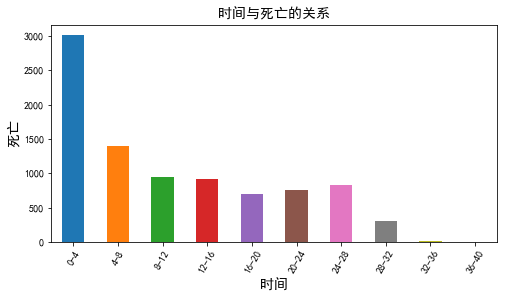

In [58]:
time_1.groupby('time_1_cut').dead.sum().plot.bar(rot=60, figsize=(8,4))
plt.xlabel("时间", fontsize=14)
plt.ylabel("死亡", fontsize=14)
plt.title('时间与死亡的关系', fontsize=14)

In [61]:
The_first = agg2.loc[(agg2[ 'killer_placement'] == 1)].dropna()

In [62]:
distance = np.sqrt(((The_first[ 'killer_position_x'] - The_first[ 'victim_position_x']) / 100) ** 2+ (

(The_first[ 'killer_position_y'] - The_first[ 'victim_position_y']) / 100) ** 2)

In [64]:
labels = [ 0, 10, 30, 50, 100, 200, 500, 800, 1000, 1500, 2000, 3000, 5000, 10000, 20000]

Text(0.5,1,'击杀距离与吃鸡的关系')

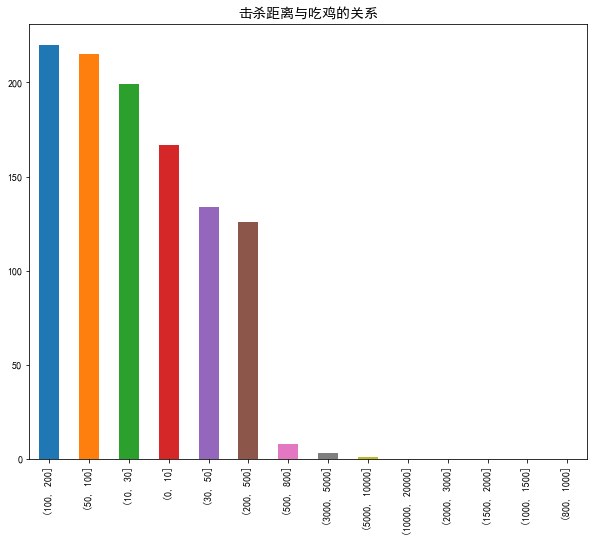

In [69]:
distan_cut = pd.cut(distance, bins=labels)

distan_cut.value_counts().plot.bar(figsize=( 10, 8))

plt.title('击杀距离与吃鸡的关系', fontsize=14)

In [25]:
f = open(r'kill.csv')#添加路径
df = pd.read_csv(f)

In [26]:
df.head()

killed_by     killer_name  killer_placement  killer_position_x  \
0      S686          Shazta              47.0           576832.6   
1   Falling             NaN               NaN                NaN   
2      M416  xoxoDayManxoxo              85.0           686101.1   
3   Mini 14      1006504801              20.0           155900.1   
4    SCAR-L    Silverlynx14              75.0           448931.5   

   killer_position_y      map  \
0           126591.8  ERANGEL   
1                NaN  ERANGEL   
2           462681.3  ERANGEL   
3           276245.4  ERANGEL   
4           620629.8  ERANGEL   

                                            match_id  time     victim_name  \
0  2U4GBNA0YmmsEbOHao4eHZaoBUZQFNgTyGAv0-SWQL9xGG...    62       WfLOVE007   
1  2U4GBNA0YmntqNsgaJorw-V1PRATWYgv_DCXAK3M6GlKkl...    67          Sweave   
2  2U4GBNA0YmlOpTxo3BcXh4G4bJO4NW0kUhLFxrcFk2tjzn...    68         Bulleye   
3  2U4GBNA0Ymkli-ww75cdN4BRIr-1X5sz41TEXSRZl7xKFa...    70  samuraigintoki   
4  2U4GBNA0YmntqNsgaJorw-V1PRATWYgv_DCXAK3M6GlKkl...    74      TheBatmans   

   victim_placement  victim_position_x  victim_position_y  
0              93.0           576486.1           125540.3  
1              91.0           436861.7           622654.4  
2              98.0           686004.7           462575.9  
3              89.0           159278.2           277084.3  
4              90.0           450986.6           620836.1

In [33]:
edf = df.loc[df['map'] == 'ERANGEL']
mdf = df.loc[df['map'] == 'MIRAMAR']

In [34]:
def killer_victim_df_maker(df):
    #挑出地图中击杀和被杀玩家的坐标
    df = edf
    victim_x_df = df.filter(regex = 'victim_position_x')
    victim_y_df = df.filter(regex = 'victim_position_y')
    killer_x_df = df.filter(regex = 'killer_position_x')
    killer_y_df = df.filter(regex = 'killer_position_y')
    #ravel()将多维矩阵变成一维
    victim_x_s = pd.Series(victim_x_df.values.ravel('F'))
    victim_y_s = pd.Series(victim_y_df.values.ravel('F'))
    killer_x_s = pd.Series(killer_x_df.values.ravel('F'))
    killer_y_s = pd.Series(killer_y_df.values.ravel('F'))
    
    vdata = {'x':victim_x_s, 'y':victim_y_s}
    kdata = {'x':killer_x_s, 'y':killer_y_s}
    
    #dropna(how = 'any')删除带nan的行
    #再留下坐标等于0（在边界上的异常数据）剔除
    victim_df = pd.DataFrame(data = vdata).dropna(how = 'any')
    victim_df = victim_df[victim_df['x'] > 0]
    killer_df = pd.DataFrame(data = kdata).dropna(how = 'any')
    killer_df = killer_df[killer_df['x'] > 0]
    return killer_df, victim_df

In [35]:
ekdf,evdf = killer_victim_df_maker(edf)
mkdf,mvdf = killer_victim_df_maker(mdf)

In [36]:
#将dataframe转换成numpy array
plot_data_ev = evdf[['x','y']].values
plot_data_ek = ekdf[['x','y']].values
plot_data_mv = mvdf[['x','y']].values
plot_data_mk = mkdf[['x','y']].values

In [37]:
# print(ekdf.head())#在森林击杀的坐标数据
# print(evdf.head())#在森林被杀的坐标数据
# print(mkdf.head())
# print(mvdf.head())
# print(len(ekdf), len(evdf), len(mkdf), len(mvdf))

#将dataframe转换成numpy array
plot_data_ev = evdf[['x','y']].values
plot_data_ek = ekdf[['x','y']].values
plot_data_mv = mvdf[['x','y']].values
plot_data_mk = mkdf[['x','y']].values

In [38]:
#将获得的坐标数据与地图上的坐标数据进行匹配
plot_data_ev = plot_data_ev * 4040 /800000
plot_data_ek = plot_data_ek * 4040 /800000
plot_data_mv = plot_data_mv * 976 /800000
plot_data_mk = plot_data_mk * 976 /800000

In [39]:
#加载模块
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [40]:
#热力图函数
def heatmap(x, y, s, bins = 100):
#    x = plot_data_ev[:,0]
#    y = plot_data_ev[:,1]
#    s = 1.5
#    bins = 800
    #np.histogram2d()将两列数值转为矩阵
    heatmap, xedges, yedges = np.histogram2d(x, y, bins = bins)
    #高斯锐化模糊对象
    heatmap = gaussian_filter(heatmap, sigma = s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

In [42]:
#读取森林地图底图
#Normalize归一化
#np.clip(x,a,b)将x中小于a的值设为a，大于b的值设为b
#cm.bwr 蓝白红
bg = imread('erangel.jpg')
hmap, extent = heatmap(plot_data_ev[:,0], plot_data_ev[:,1], 1.5, bins =800)
alphas = np.clip(Normalize(0, hmap.max()/100, clip=True)(hmap)*1.5,0.0,1.)
colors = Normalize(hmap.max()/100, hmap.max()/20, clip=True)(hmap)
colors = cm.bwr(colors)
colors[..., -1] = alphas

hmap2, extent2 = heatmap(plot_data_ek[:,0],plot_data_ek[:,1],1.5, bins = 800)
alphas2 = np.clip(Normalize(0, hmap2.max()/100, clip = True)(hmap2)*1.5, 0.0, 1.)
colors2 = Normalize(hmap2.max()/100, hmap2.max()/20, clip=True)(hmap2)
colors2 = cm.RdBu(colors2)
colors2[...,-1] = alphas2


E:\anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


Text(0.5,1,'森林地图死亡率图')

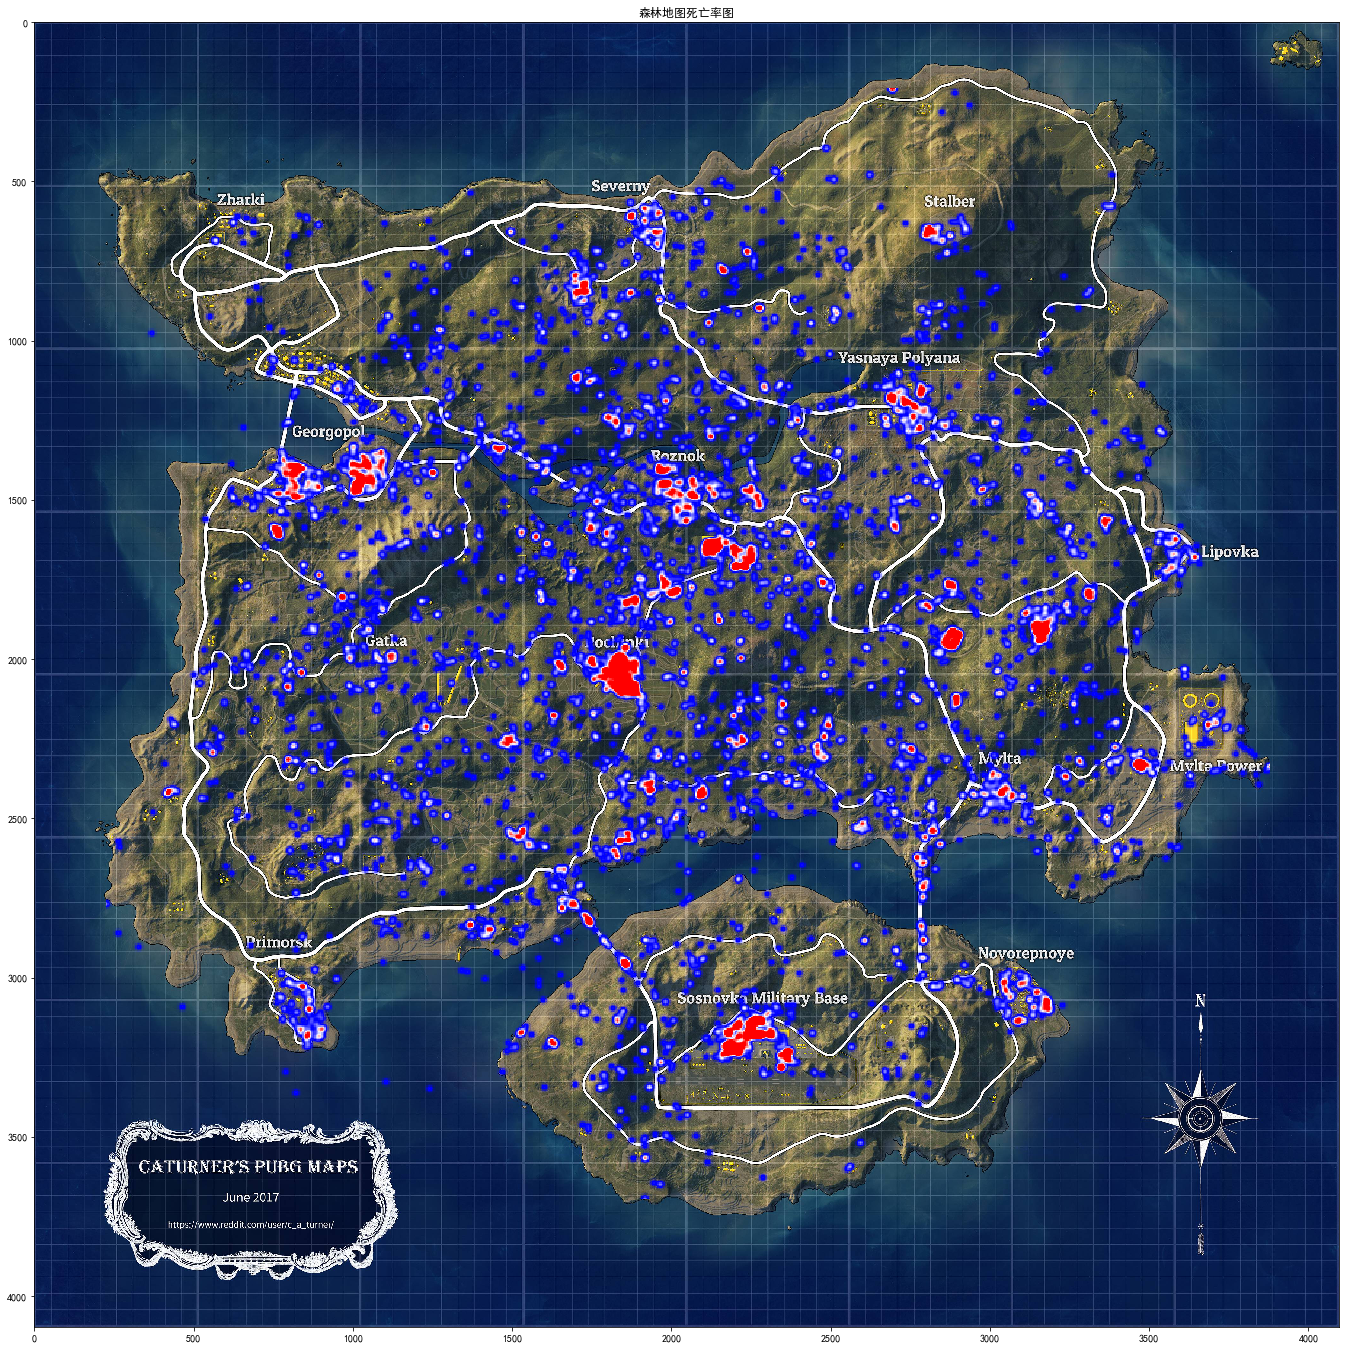

In [43]:
#'森林死亡率图'
fig, ax = plt.subplots(figsize = (24,24))
ax.set_xlim(0, 4096);ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent = extent, origin = 'lower', cmap = cm.bwr, alpha = 1)
#ax.imshow(colors2, extent = extent2, origin = 'lower', cmap = cm.RdBu, alpha = 0.5)
plt.gca().invert_yaxis()
plt.title('森林地图死亡率图')